----

# <p style='text-align: center;'> E-Commerce and Retail B2B Case Study </p>
----

### <font color = blue> <p style='text-align: center;'> Submitted by </p>
<font color = blue> <p style='text-align: center;'> Atul Mani </p>
<font color = blue> <p style='text-align: center;'> Harish Prabhakar </p>
<font color = blue> <p style='text-align: center;'> Nguyen Thi Thu Huong </p>
    
----

## Step-1: Data Load

In [1]:
# Importing packages

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading data

history = pd.read_csv('Received_Payments_Data.csv')
history.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [3]:
history.shape

(93937, 16)

## Step-2: Data Preparation

In [4]:
# Converting date columns to date format

history['RECEIPT_DATE'] = pd.to_datetime(history['RECEIPT_DATE'])
history['INVOICE_CREATION_DATE'] = pd.to_datetime(history['INVOICE_CREATION_DATE'])
history['DUE_DATE'] = pd.to_datetime(history['DUE_DATE'])

history.head(10)

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,2021-04-20,PMT,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,PMT,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods
5,WIRE,FARO Corp,1409,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000040,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods
6,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods
7,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods
8,WIRE,FARO Corp,1409,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods
9,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods


#### Following columns are only a record identifier.
- CUSTOMER_NAME
- CUSTOMER_NUMBER
- RECEIPT_DOC_NO
- INVOICE_ALLOCATED

We will keep CUSTOMER_NAME only for segmenting the customer and drop other columns.

In [5]:
history.drop(columns=["CUSTOMER_NUMBER", "RECEIPT_DOC_NO", "INVOICE_ALLOCATED"], inplace=True)
history.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,2021-04-20,PMT,USD,370990.92,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,2021-01-31,PMT,SAR,183750.00,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,2021-01-31,PMT,SAR,157500.00,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,2021-01-31,PMT,SAR,157500.00,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,2021-01-31,PMT,SAR,157500.00,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods


#### Following columns are attributes of payment amount:
- CURRENCY_CODE
- Local Amount
- USD Amount
- INVOICE_CURRENCY_CODE

keeping only USD Amount for value and INVOICE_CURRENCY_CODE as attributes which may play role in defaulting. Dropping other two.

In [6]:
history.drop(columns=["CURRENCY_CODE", "Local Amount"], inplace=True)
history.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CLASS,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,2021-04-20,PMT,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,2021-01-31,PMT,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,2021-01-31,PMT,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,2021-01-31,PMT,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,2021-01-31,PMT,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods


## STEP-3: Creating Customer Segments by Classification modelling

### Creating numeric value for PAYMENT_TIME

In [7]:
history["PAYMENT_TIME"] = (history.RECEIPT_DATE - history.INVOICE_CREATION_DATE).dt.days
history.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CLASS,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,PAYMENT_TIME
0,WIRE,C EA Corp,2021-04-20,PMT,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,169
1,WIRE,RADW Corp,2021-01-31,PMT,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,33
2,WIRE,RADW Corp,2021-01-31,PMT,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,1
3,WIRE,FARO Corp,2021-01-31,PMT,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,47
4,WIRE,RADW Corp,2021-01-31,PMT,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,47


In [8]:
# Average time of payment
mean_pt = history.groupby('CUSTOMER_NAME')['PAYMENT_TIME'].mean()
mean_pt = mean_pt.reset_index()
mean_pt.columns = ['CUSTOMER_NAME', 'PAYMENT_TIME_MEAN']
mean_pt.head()

,CUSTOMER_NAME,PAYMENT_TIME_MEAN
0,3D D Corp,24.395349
1,6TH Corp,40.666667
2,A3 D Corp,45.400000
3,ABC Corp,16.000000
4,ABDU Corp,76.906250


In [9]:
# Standard deviation of payment time
std_pt = history.groupby('CUSTOMER_NAME')['PAYMENT_TIME'].std()
std_pt = std_pt.reset_index()
std_pt.columns = ['CUSTOMER_NAME', 'PAYMENT_TIME_STDEV']
std_pt.head()

,CUSTOMER_NAME,PAYMENT_TIME_STDEV
0,3D D Corp,13.040449
1,6TH Corp,7.952987
2,A3 D Corp,52.581366
3,ABC Corp,0.000000
4,ABDU Corp,54.919326


In [10]:
# merge the two dfs
cust_seg = pd.merge(mean_pt, std_pt, on='CUSTOMER_NAME', how='inner')
cust_seg.head()

,CUSTOMER_NAME,PAYMENT_TIME_MEAN,PAYMENT_TIME_STDEV
0,3D D Corp,24.395349,13.040449
1,6TH Corp,40.666667,7.952987
2,A3 D Corp,45.400000,52.581366
3,ABC Corp,16.000000,0.000000
4,ABDU Corp,76.906250,54.919326


In [11]:
cust_seg.head()

,CUSTOMER_NAME,PAYMENT_TIME_MEAN,PAYMENT_TIME_STDEV
0,3D D Corp,24.395349,13.040449
1,6TH Corp,40.666667,7.952987
2,A3 D Corp,45.400000,52.581366
3,ABC Corp,16.000000,0.000000
4,ABDU Corp,76.906250,54.919326


In [12]:
cust_seg.PAYMENT_TIME_MEAN.mean()

102.77576007158687

In [13]:
# Importing packages for clustering

import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

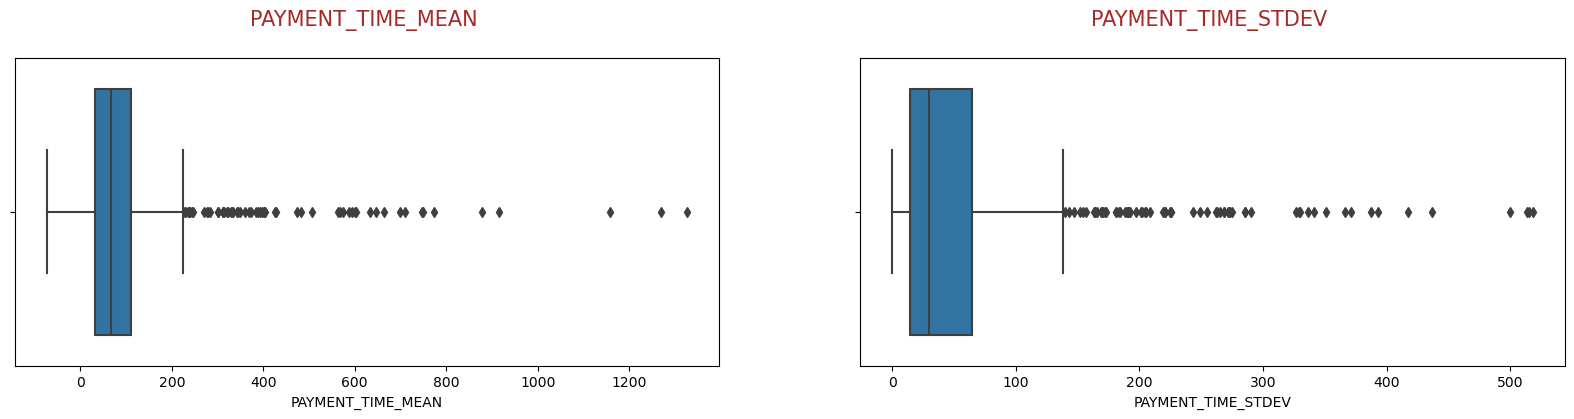

In [14]:
fig, ax = plt.subplots(figsize=[20,4])
plt.subplot(1,2,1)
sns.boxplot(cust_seg["PAYMENT_TIME_MEAN"])
plt.title('PAYMENT_TIME_MEAN \n',fontsize=15,color='brown')
plt.subplot(1,2,2)
sns.boxplot(cust_seg["PAYMENT_TIME_STDEV"])

plt.title('PAYMENT_TIME_STDEV \n',fontsize=15,color='brown')

plt.show()

In [15]:
# removing (statistical) outliers
Q1 = cust_seg.PAYMENT_TIME_MEAN.quantile(0.05)
Q3 = cust_seg.PAYMENT_TIME_MEAN.quantile(0.95)
IQR = Q3 - Q1
cust_seg = cust_seg[(cust_seg.PAYMENT_TIME_MEAN >= Q1 - 1.5*IQR) & (cust_seg.PAYMENT_TIME_MEAN <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = cust_seg.PAYMENT_TIME_STDEV.quantile(0.05)
Q3 = cust_seg.PAYMENT_TIME_STDEV.quantile(0.95)
IQR = Q3 - Q1
cust_seg = cust_seg[(cust_seg.PAYMENT_TIME_STDEV >= Q1 - 1.5*IQR) & (cust_seg.PAYMENT_TIME_STDEV <= Q3 + 1.5*IQR)]

In [16]:
# 2. rescaling
rfm_df = cust_seg[['PAYMENT_TIME_MEAN', 'PAYMENT_TIME_STDEV']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(601, 2)

In [17]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['PAYMENT_TIME_MEAN', 'PAYMENT_TIME_STDEV']
rfm_df_scaled.head()

,PAYMENT_TIME_MEAN,PAYMENT_TIME_STDEV
0,-0.630474,-0.567651
1,-0.490202,-0.630341
2,-0.449397,-0.080405
3,-0.702849,-0.728343
4,-0.177788,-0.051596


In [18]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [19]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       3, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

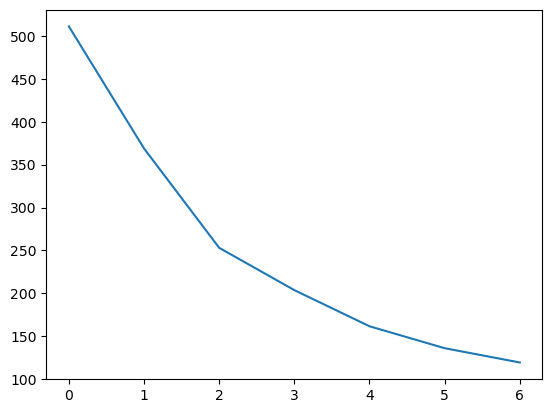

In [20]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [21]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.7406141892218778
For n_clusters=3, the silhouette score is 0.5953118236929293
For n_clusters=4, the silhouette score is 0.6017473573693072
For n_clusters=5, the silhouette score is 0.4238787752434701
For n_clusters=6, the silhouette score is 0.42921760404389225
For n_clusters=7, the silhouette score is 0.41793623745890746
For n_clusters=8, the silhouette score is 0.3872360062300627


In [22]:
# final model with k=4
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [23]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
# assign the label
cust_seg['Cust_Segment'] = kmeans.labels_
cust_seg.head()

,CUSTOMER_NAME,PAYMENT_TIME_MEAN,PAYMENT_TIME_STDEV,Cust_Segment
0,3D D Corp,24.395349,13.040449,0
1,6TH Corp,40.666667,7.952987,0
2,A3 D Corp,45.400000,52.581366,0
3,ABC Corp,16.000000,0.000000,0
4,ABDU Corp,76.906250,54.919326,0


<AxesSubplot:xlabel='Cust_Segment', ylabel='PAYMENT_TIME_MEAN'>

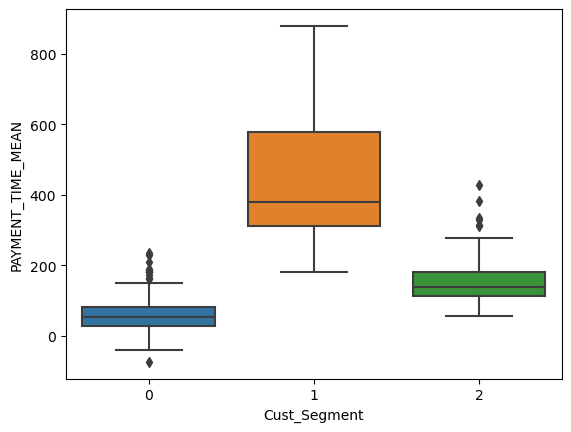

In [25]:
# plot
sns.boxplot(x='Cust_Segment', y='PAYMENT_TIME_MEAN', data=cust_seg)

<AxesSubplot:xlabel='Cust_Segment', ylabel='PAYMENT_TIME_STDEV'>

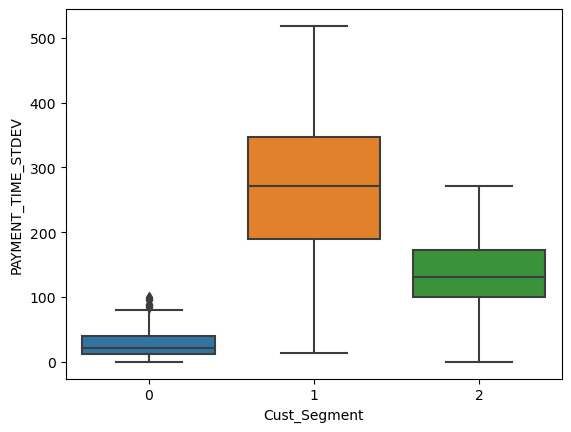

In [26]:
# plot
sns.boxplot(x='Cust_Segment', y='PAYMENT_TIME_STDEV', data=cust_seg)

In [27]:
# Joining customer segment data with original dataframe:

history = pd.merge(history, cust_seg, on='CUSTOMER_NAME', how='left')
history.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CLASS,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,PAYMENT_TIME,PAYMENT_TIME_MEAN,PAYMENT_TIME_STDEV,Cust_Segment
0,WIRE,C EA Corp,2021-04-20,PMT,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,169,99.000000,64.490309,0.0
1,WIRE,RADW Corp,2021-01-31,PMT,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,33,48.871281,51.635656,0.0
2,WIRE,RADW Corp,2021-01-31,PMT,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,1,48.871281,51.635656,0.0
3,WIRE,FARO Corp,2021-01-31,PMT,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,47,151.122834,254.364892,2.0
4,WIRE,RADW Corp,2021-01-31,PMT,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,47,48.871281,51.635656,0.0


In [28]:
# Assigning a additional segment to the customer who were not segmented due to outlier in segmentation variable.
history['Cust_Segment'][history['Cust_Segment'].isna()] = 3
history['Cust_Segment'].value_counts()

2.0    47030
0.0    39725
1.0     7076
3.0      106
Name: Cust_Segment, dtype: int64

In [29]:
# Dropping PAYMENT_TIME_MEAN and PAYMENT_TIME_STDEV, PAYMENT_TIME and CUSTOMER_NAME
history.drop(columns=["PAYMENT_TIME_MEAN", "PAYMENT_TIME_STDEV", "PAYMENT_TIME", "CUSTOMER_NAME"], inplace=True)
history.head()

,RECEIPT_METHOD,RECEIPT_DATE,CLASS,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,Cust_Segment
0,WIRE,2021-04-20,PMT,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,0.0
1,WIRE,2021-01-31,PMT,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,0.0
2,WIRE,2021-01-31,PMT,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0.0
3,WIRE,2021-01-31,PMT,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,2.0
4,WIRE,2021-01-31,PMT,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,0.0


### Creating numeric value for Payment_term

In [30]:
history["PAYMENT_TERM"] = (history.DUE_DATE - history.INVOICE_CREATION_DATE).dt.days
history.head()

,RECEIPT_METHOD,RECEIPT_DATE,CLASS,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,Cust_Segment
0,WIRE,2021-04-20,PMT,101018.63040,2020-11-02,2020-12-30,58,INV,AED,Non Goods,0.0
1,WIRE,2021-01-31,PMT,48990.21133,2020-12-29,2021-01-28,30,INV,SAR,Non Goods,0.0
2,WIRE,2021-01-31,PMT,41991.60971,2021-01-30,2021-03-01,30,INV,SAR,Non Goods,0.0
3,WIRE,2021-01-31,PMT,41991.60971,2020-12-15,2021-01-14,30,INV,SAR,Non Goods,2.0
4,WIRE,2021-01-31,PMT,41991.60971,2020-12-15,2021-01-14,30,INV,SAR,Non Goods,0.0


### It is possible that the day, weekday and month of year of DUE_DATE is correlated to the late in payment, hence creating columns with following variables:
- Day of month
- Day of week
- Month of year

In [31]:
history["Day_of_Month"] = history["DUE_DATE"].dt.day
history["Day_of_Week"] = history["DUE_DATE"].dt.weekday
history["Monthof_Year"] = history["DUE_DATE"].dt.month
history.head()

,RECEIPT_METHOD,RECEIPT_DATE,CLASS,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,Cust_Segment,Day_of_Month,Day_of_Week,Monthof_Year
0,WIRE,2021-04-20,PMT,101018.63040,2020-11-02,2020-12-30,58,INV,AED,Non Goods,0.0,30,2,12
1,WIRE,2021-01-31,PMT,48990.21133,2020-12-29,2021-01-28,30,INV,SAR,Non Goods,0.0,28,3,1
2,WIRE,2021-01-31,PMT,41991.60971,2021-01-30,2021-03-01,30,INV,SAR,Non Goods,0.0,1,0,3
3,WIRE,2021-01-31,PMT,41991.60971,2020-12-15,2021-01-14,30,INV,SAR,Non Goods,2.0,14,3,1
4,WIRE,2021-01-31,PMT,41991.60971,2020-12-15,2021-01-14,30,INV,SAR,Non Goods,0.0,14,3,1


### Creating Target column bay comparing due date and payment date.
- 1 will represent late payment
- 0 will represent paymnet before or on due date

In [32]:
# Creating difference of due date and payment date
history['Target'] = (history.DUE_DATE - history.RECEIPT_DATE).dt.days

# coding late payment as 1 and on-time payment as 0
history['Target'][history['Target']>=0] = 0
history['Target'][history['Target']<0] = 1
history.head()

,RECEIPT_METHOD,RECEIPT_DATE,CLASS,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,Cust_Segment,Day_of_Month,Day_of_Week,Monthof_Year,Target
0,WIRE,2021-04-20,PMT,101018.63040,2020-11-02,2020-12-30,58,INV,AED,Non Goods,0.0,30,2,12,1
1,WIRE,2021-01-31,PMT,48990.21133,2020-12-29,2021-01-28,30,INV,SAR,Non Goods,0.0,28,3,1,1
2,WIRE,2021-01-31,PMT,41991.60971,2021-01-30,2021-03-01,30,INV,SAR,Non Goods,0.0,1,0,3,0
3,WIRE,2021-01-31,PMT,41991.60971,2020-12-15,2021-01-14,30,INV,SAR,Non Goods,2.0,14,3,1,1
4,WIRE,2021-01-31,PMT,41991.60971,2020-12-15,2021-01-14,30,INV,SAR,Non Goods,0.0,14,3,1,1


#### Dropping the following date columns, as just the value of date should not be related to the delay in payment.
- RECEIPT_DATE
- DUE_DATE
- INVOICE_CREATION_DATE

In [33]:
history.drop(columns=["RECEIPT_DATE", "INVOICE_CREATION_DATE", "DUE_DATE"], inplace=True)
history.head()

,RECEIPT_METHOD,CLASS,USD Amount,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,Cust_Segment,Day_of_Month,Day_of_Week,Monthof_Year,Target
0,WIRE,PMT,101018.63040,58,INV,AED,Non Goods,0.0,30,2,12,1
1,WIRE,PMT,48990.21133,30,INV,SAR,Non Goods,0.0,28,3,1,1
2,WIRE,PMT,41991.60971,30,INV,SAR,Non Goods,0.0,1,0,3,0
3,WIRE,PMT,41991.60971,30,INV,SAR,Non Goods,2.0,14,3,1,1
4,WIRE,PMT,41991.60971,30,INV,SAR,Non Goods,0.0,14,3,1,1


## Step-3: Data Interpretation and Cleaning

In [34]:
# shape of data
history.shape

(93937, 12)

In [35]:
# data information
history.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93937 entries, 0 to 93936
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CLASS                  93937 non-null  object 
 2   USD Amount             93937 non-null  float64
 3   PAYMENT_TERM           93937 non-null  int64  
 4   INVOICE_CLASS          93937 non-null  object 
 5   INVOICE_CURRENCY_CODE  93937 non-null  object 
 6   INVOICE_TYPE           93937 non-null  object 
 7   Cust_Segment           93937 non-null  float64
 8   Day_of_Month           93937 non-null  int64  
 9   Day_of_Week            93937 non-null  int64  
 10  Monthof_Year           93937 non-null  int64  
 11  Target                 93937 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 9.3+ MB


### It is clear that data has no missing values.

In [36]:
# just confirming for null values

# Percentage of Null Values for every column

round( 100 * history.isnull().sum() / len(history), 2 )

RECEIPT_METHOD           0.0
CLASS                    0.0
USD Amount               0.0
PAYMENT_TERM             0.0
INVOICE_CLASS            0.0
INVOICE_CURRENCY_CODE    0.0
INVOICE_TYPE             0.0
Cust_Segment             0.0
Day_of_Month             0.0
Day_of_Week              0.0
Monthof_Year             0.0
Target                   0.0
dtype: float64

In [37]:
# data information
history.describe()

,USD Amount,PAYMENT_TERM,Cust_Segment,Day_of_Month,Day_of_Week,Monthof_Year,Target
count,9.393700e+04,93937.000000,93937.000000,93937.000000,93937.000000,93937.000000,93937.000000
mean,5.312013e+05,42.291749,1.080022,21.021887,3.225151,4.534465,0.659783
std,9.508693e+05,61.396547,0.960034,8.959205,2.031654,3.080726,0.473785
min,0.000000e+00,-3622.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,3.766298e+04,30.000000,0.000000,15.000000,1.000000,2.000000,0.000000
50%,1.810010e+05,45.000000,2.000000,24.000000,3.000000,4.000000,1.000000
75%,5.996137e+05,60.000000,2.000000,30.000000,5.000000,6.000000,1.000000
max,1.084983e+07,365.000000,3.000000,31.000000,6.000000,12.000000,1.000000


### Checking for Outliers in USD Amount and PAYMENT_TERM

In [38]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
history.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,USD Amount,PAYMENT_TERM,Cust_Segment,Day_of_Month,Day_of_Week,Monthof_Year,Target
count,9.393700e+04,93937.000000,93937.000000,93937.000000,93937.000000,93937.000000,93937.000000
mean,5.312013e+05,42.291749,1.080022,21.021887,3.225151,4.534465,0.659783
std,9.508693e+05,61.396547,0.960034,8.959205,2.031654,3.080726,0.473785
min,0.000000e+00,-3622.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,3.766298e+04,30.000000,0.000000,15.000000,1.000000,2.000000,0.000000
50%,1.810010e+05,45.000000,2.000000,24.000000,3.000000,4.000000,1.000000
75%,5.996137e+05,60.000000,2.000000,30.000000,5.000000,6.000000,1.000000
90%,1.257455e+06,81.000000,2.000000,30.000000,6.000000,10.000000,1.000000
95%,2.101629e+06,90.000000,2.000000,30.000000,6.000000,12.000000,1.000000
99%,5.814128e+06,111.000000,2.000000,31.000000,6.000000,12.000000,1.000000


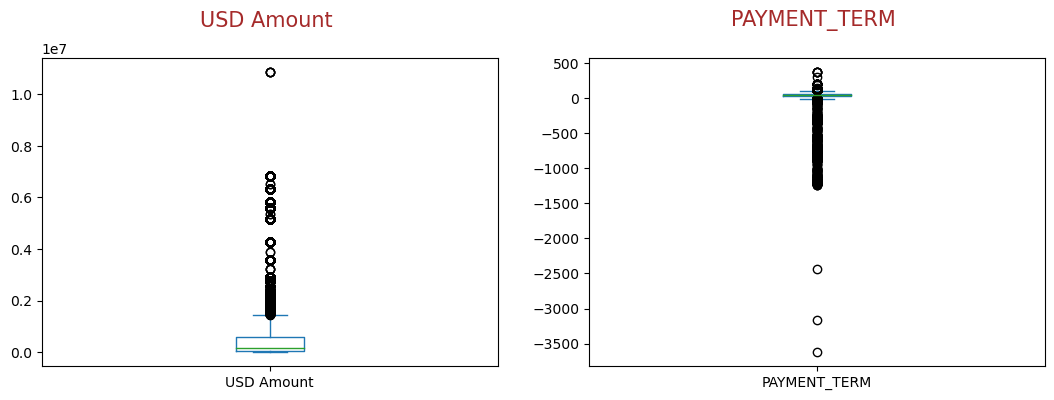

In [39]:
fig, ax = plt.subplots(figsize=[20,4])
plt.subplot(1,3,1)
history['USD Amount'].plot.box()
plt.title('USD Amount \n',fontsize=15,color='brown')

plt.subplot(1,3,2)
history['PAYMENT_TERM'].plot.box()
plt.title('PAYMENT_TERM \n',fontsize=15,color='brown')

plt.show()

In [40]:
history.dtypes

RECEIPT_METHOD            object
CLASS                     object
USD Amount               float64
PAYMENT_TERM               int64
INVOICE_CLASS             object
INVOICE_CURRENCY_CODE     object
INVOICE_TYPE              object
Cust_Segment             float64
Day_of_Month               int64
Day_of_Week                int64
Monthof_Year               int64
Target                     int64
dtype: object

#### As Following columns are not in final open invoices data set, dropping these columns
- INVOICE_CLASS
- INVOICE_TYPE
- RECEIPT_METHOD
- CLASS

In [41]:
history.drop(columns=["INVOICE_CLASS", "INVOICE_TYPE", "RECEIPT_METHOD", "CLASS"], inplace=True)

In [42]:
history.dtypes

USD Amount               float64
PAYMENT_TERM               int64
INVOICE_CURRENCY_CODE     object
Cust_Segment             float64
Day_of_Month               int64
Day_of_Week                int64
Monthof_Year               int64
Target                     int64
dtype: object

In [43]:
# categorical columns 
cat_cols = ["INVOICE_CURRENCY_CODE"]

In [44]:
history.INVOICE_CURRENCY_CODE.value_counts(normalize=True)

SAR    0.417290
AED    0.344667
USD    0.197441
EUR    0.016170
KWD    0.011593
QAR    0.006504
BHD    0.004258
GBP    0.001426
JOD    0.000405
ZAR    0.000245
Name: INVOICE_CURRENCY_CODE, dtype: float64

In [45]:
# combining INVOICE_CURRENCY_CODE into others which has less than 2% values

history["INVOICE_CURRENCY_CODE"] = np.where(history["INVOICE_CURRENCY_CODE"].isin(["SAR","AED", "USD"]), history["INVOICE_CURRENCY_CODE"], "Others")

In [46]:
history.INVOICE_CURRENCY_CODE.value_counts(normalize=True)

SAR       0.417290
AED       0.344667
USD       0.197441
Others    0.040602
Name: INVOICE_CURRENCY_CODE, dtype: float64

##### Now the data is ready for feature engineering: One hot encoding

In [47]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(history[["INVOICE_CURRENCY_CODE"]], drop_first=True)

# Adding the results to the master dataframe
data = pd.concat([history, dummy1], axis=1)
data.head()

,USD Amount,PAYMENT_TERM,INVOICE_CURRENCY_CODE,Cust_Segment,Day_of_Month,Day_of_Week,Monthof_Year,Target,INVOICE_CURRENCY_CODE_Others,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD
0,101018.63040,58,AED,0.0,30,2,12,1,0,0,0
1,48990.21133,30,SAR,0.0,28,3,1,1,0,1,0
2,41991.60971,30,SAR,0.0,1,0,3,0,0,1,0
3,41991.60971,30,SAR,2.0,14,3,1,1,0,1,0
4,41991.60971,30,SAR,0.0,14,3,1,1,0,1,0


In [48]:
# Dropiing categorical columns
data.drop(columns=["INVOICE_CURRENCY_CODE"], inplace=True)
data.head()

,USD Amount,PAYMENT_TERM,Cust_Segment,Day_of_Month,Day_of_Week,Monthof_Year,Target,INVOICE_CURRENCY_CODE_Others,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD
0,101018.63040,58,0.0,30,2,12,1,0,0,0
1,48990.21133,30,0.0,28,3,1,1,0,1,0
2,41991.60971,30,0.0,1,0,3,0,0,1,0
3,41991.60971,30,2.0,14,3,1,1,0,1,0
4,41991.60971,30,0.0,14,3,1,1,0,1,0


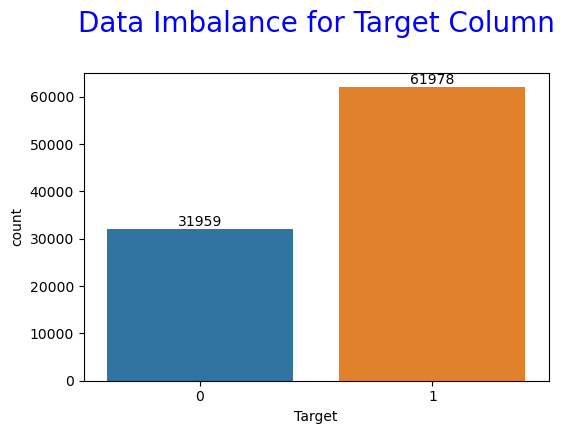

In [49]:
# Checking for data imbalance

#Let us check for data imbalance for target column

fig, ax = plt.subplots(figsize=[6,4])

bars=sns.countplot(x='Target', data= data).set_title('Data Imbalance for Target Column\n',color='blue',fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

### Data is not much imbalanced for practical purposes

## Step-4 Train Test Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# Putting feature variable to X
X = data.drop(['Target'], axis=1)

X.head()

,USD Amount,PAYMENT_TERM,Cust_Segment,Day_of_Month,Day_of_Week,Monthof_Year,INVOICE_CURRENCY_CODE_Others,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD
0,101018.63040,58,0.0,30,2,12,0,0,0
1,48990.21133,30,0.0,28,3,1,0,1,0
2,41991.60971,30,0.0,1,0,3,0,1,0
3,41991.60971,30,2.0,14,3,1,0,1,0
4,41991.60971,30,0.0,14,3,1,0,1,0


In [52]:
# Putting response variable to y
y = data['Target']

y.head()

0    1
1    1
2    0
3    1
4    1
Name: Target, dtype: int64

In [53]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

X_train[['USD Amount','PAYMENT_TERM']] = scaler.fit_transform(X_train[['USD Amount','PAYMENT_TERM']])

X_train.head()

,USD Amount,PAYMENT_TERM,Cust_Segment,Day_of_Month,Day_of_Week,Monthof_Year,INVOICE_CURRENCY_CODE_Others,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD
214,-0.486017,-0.217101,2.0,30,1,3,0,0,1
28353,0.060637,-0.200740,0.0,20,2,1,0,0,1
70381,-0.453146,-0.200740,0.0,25,3,2,0,0,0
93001,-0.553454,-0.004415,0.0,30,1,3,0,0,0
91650,0.066625,-0.217101,0.0,4,4,12,0,0,0


In [56]:
### Checking the lead conversion
delay_rate = (sum(data['Target'])/len(data['Target'].index))*100
delay_rate

65.97826202667746

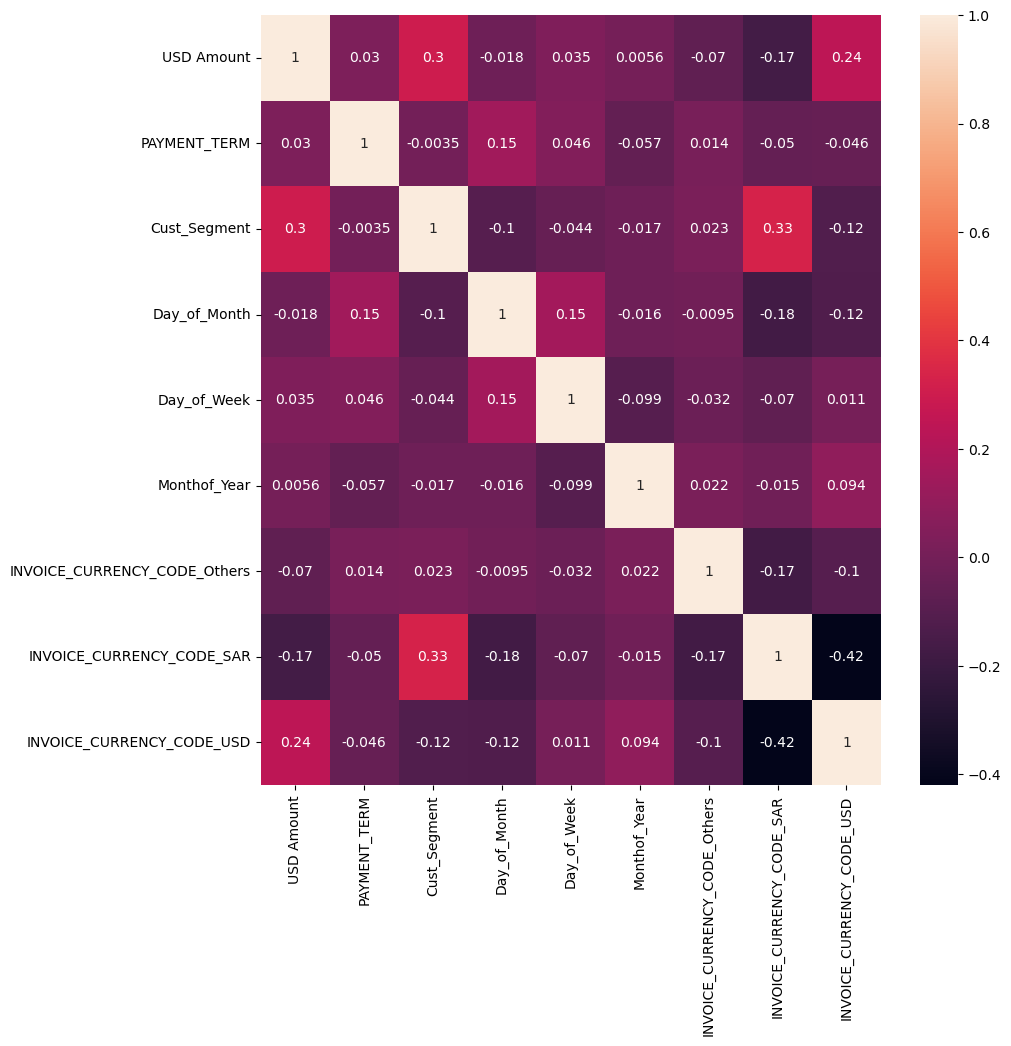

In [57]:
# Let's see the correlation matrix 
plt.figure(figsize = (10,10))        
sns.heatmap(X_train.corr(), annot=True)
plt.show()

#### There is not much correlations between variables.

## Step-5 Model Building

In [58]:
import statsmodels.api as sm

In [59]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                65755
Model:                            GLM   Df Residuals:                    65745
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32600.
Date:                Tue, 08 Aug 2023   Deviance:                       65200.
Time:                        22:14:48   Pearson chi2:                 7.15e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2537
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            2.2688      0.044     51.948      0.000       2.183       2.354
USD Amount                      -0.1203      0.011    -10.843      0.000      -0.142      -0.099
PAYMENT_TERM                    -1.0963      0.023    -47.790      0.000      -1.141      -1.051
Cust_Segment                     0.1186      0.012     10.211      0.000       0.096       0.141
Day_of_Month                    -0.1097      0.001    -78.863      0.000      -0.112      -0.107
Day_of_Week                      0.0011      0.005      0.233      0.816      -0.008       0.011
Monthof_Year                     0.1198      0.004     33.839      0.000       0.113       0.127
INVOICE_CURRENCY_CODE_Others    -0.1714      0.048     -3.534      0.000      -0.266      -0.076
INVOICE_CURRENCY_CODE_SAR        0.6331      0.024     26.351      0.000       0.586       0.680
INVOICE_CURRENCY_CODE_USD        0.5161      0.028     18.392      0.000       0.461       0.571
================================================================================================
"""

#### Feature Selection using RFE

In [60]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [61]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 10)           
rfe = rfe.fit(X_train, y_train)

In [62]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [63]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('USD Amount', True, 1),
 ('PAYMENT_TERM', True, 1),
 ('Cust_Segment', True, 1),
 ('Day_of_Month', True, 1),
 ('Day_of_Week', True, 1),
 ('Monthof_Year', True, 1),
 ('INVOICE_CURRENCY_CODE_Others', True, 1),
 ('INVOICE_CURRENCY_CODE_SAR', True, 1),
 ('INVOICE_CURRENCY_CODE_USD', True, 1)]

In [64]:
col = X_train.columns[rfe.support_]

In [65]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

### Assessing the model with StatsModels

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                65755
Model:                            GLM   Df Residuals:                    65745
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32600.
Date:                Tue, 08 Aug 2023   Deviance:                       65200.
Time:                        22:14:49   Pearson chi2:                 7.15e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2537
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            2.2688      0.044     51.948      0.000       2.183       2.354
USD Amount                      -0.1203      0.011    -10.843      0.000      -0.142      -0.099
PAYMENT_TERM                    -1.0963      0.023    -47.790      0.000      -1.141      -1.051
Cust_Segment                     0.1186      0.012     10.211      0.000       0.096       0.141
Day_of_Month                    -0.1097      0.001    -78.863      0.000      -0.112      -0.107
Day_of_Week                      0.0011      0.005      0.233      0.816      -0.008       0.011
Monthof_Year                     0.1198      0.004     33.839      0.000       0.113       0.127
INVOICE_CURRENCY_CODE_Others    -0.1714      0.048     -3.534      0.000      -0.266      -0.076
INVOICE_CURRENCY_CODE_SAR        0.6331      0.024     26.351      0.000       0.586       0.680
INVOICE_CURRENCY_CODE_USD        0.5161      0.028     18.392      0.000       0.461       0.571
================================================================================================
"""

In [67]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Day_of_Month,4.16
4,Day_of_Week,3.17
2,Cust_Segment,2.84
5,Monthof_Year,2.79
7,INVOICE_CURRENCY_CODE_SAR,2.41
8,INVOICE_CURRENCY_CODE_USD,1.50
0,USD Amount,1.26
6,INVOICE_CURRENCY_CODE_Others,1.12
1,PAYMENT_TERM,1.03


#### VIF value for following two variables are too high
- Day_of_Month

In [69]:
# Dropping these variables from feature cols:

col = col.drop('Day_of_Month')
col

Index(['USD Amount', 'PAYMENT_TERM', 'Cust_Segment', 'Day_of_Week',
       'Monthof_Year', 'INVOICE_CURRENCY_CODE_Others',
       'INVOICE_CURRENCY_CODE_SAR', 'INVOICE_CURRENCY_CODE_USD'],
      dtype='object')

#### Building new model

In [70]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                65755
Model:                            GLM   Df Residuals:                    65746
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36518.
Date:                Tue, 08 Aug 2023   Deviance:                       73036.
Time:                        22:14:49   Pearson chi2:                 6.28e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1593
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.2026      0.027     -7.432      0.000      -0.256      -0.149
USD Amount                      -0.1108      0.010    -10.685      0.000      -0.131      -0.090
PAYMENT_TERM                    -1.4232      0.022    -65.121      0.000      -1.466      -1.380
Cust_Segment                     0.1776      0.011     16.112      0.000       0.156       0.199
Day_of_Week                     -0.0577      0.004    -12.870      0.000      -0.066      -0.049
Monthof_Year                     0.0960      0.003     28.917      0.000       0.089       0.102
INVOICE_CURRENCY_CODE_Others     0.1846      0.045      4.091      0.000       0.096       0.273
INVOICE_CURRENCY_CODE_SAR        1.0203      0.022     45.867      0.000       0.977       1.064
INVOICE_CURRENCY_CODE_USD        0.9194      0.026     35.250      0.000       0.868       0.971
================================================================================================
"""

In [71]:
# Checking VIF Again
vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Cust_Segment,2.72
6,INVOICE_CURRENCY_CODE_SAR,2.41
4,Monthof_Year,2.37
3,Day_of_Week,2.23
7,INVOICE_CURRENCY_CODE_USD,1.49
0,USD Amount,1.25
5,INVOICE_CURRENCY_CODE_Others,1.12
1,PAYMENT_TERM,1.01


### This model has VIF under acceptable range and all p values are under limits.

### Step-6 Prediction on Train Data

In [72]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [73]:
y_train_pred[:10]

array([0.84092371, 0.72640055, 0.53799776, 0.52379925, 0.7349662 ,
       0.90059466, 0.91470327, 0.82211608, 0.55945369, 0.82528986])

In [74]:
y_train_pred_final = pd.DataFrame({'Target':y_train.values, 'Delay_Prob':y_train_pred})

y_train_pred_final['Pred_ID'] = y_train.index

y_train_pred_final.head()

,Target,Delay_Prob,Pred_ID
0,1,0.840924,214
1,1,0.726401,28353
2,0,0.537998,70381
3,1,0.523799,93001
4,1,0.734966,91650


In [75]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Delay_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Target,Delay_Prob,Pred_ID,predicted
0,1,0.840924,214,1
1,1,0.726401,28353,1
2,0,0.537998,70381,1
3,1,0.523799,93001,1
4,1,0.734966,91650,1


In [76]:
from sklearn import metrics

In [77]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.predicted))

0.7063797429853244


In [78]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.predicted )
confusion

array([[ 9203, 13261],
       [ 6046, 37245]], dtype=int64)

In [79]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [80]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8603404864752489

In [81]:
# Let us calculate specificity
TN / float(TN+FP)

0.4096777065527066

In [82]:
# Calculate false postive rate - predicting Conversion when customer does not have converted
print(FP/ float(TN+FP))

0.5903222934472935


In [83]:
# positive predictive value 
print (TP / float(TP+FP))

0.7374371361818398


In [84]:
# Negative predictive value
print (TN / float(TN+ FN))

0.6035149845891534


## ROC Curve

In [85]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [86]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Target, y_train_pred_final.Delay_Prob, drop_intermediate = False )


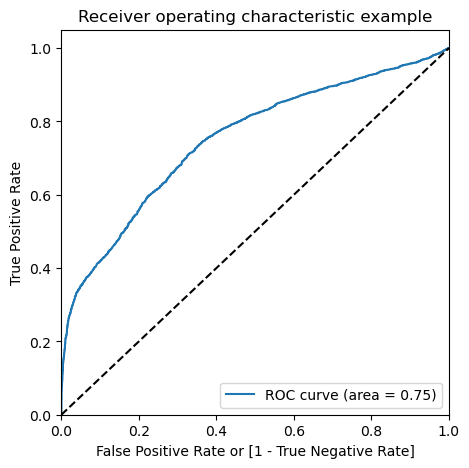

In [87]:
draw_roc(y_train_pred_final.Target, y_train_pred_final.Delay_Prob)

# Finding Optimal Cutoff Point

### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [88]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Delay_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Target,Delay_Prob,Pred_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.840924,214,1,1,1,1,1,1,1,1,1,1,0
1,1,0.726401,28353,1,1,1,1,1,1,1,1,1,0,0
2,0,0.537998,70381,1,1,1,1,1,1,1,0,0,0,0
3,1,0.523799,93001,1,1,1,1,1,1,1,0,0,0,0
4,1,0.734966,91650,1,1,1,1,1,1,1,1,1,0,0


In [89]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.658368  1.000000  0.000000
0.1   0.1  0.658231  0.999677  0.000223
0.2   0.2  0.658353  0.993509  0.012464
0.3   0.3  0.661121  0.962071  0.081152
0.4   0.4  0.682123  0.918713  0.226184
0.5   0.5  0.706380  0.860340  0.409678
0.6   0.6  0.712554  0.780717  0.581197
0.7   0.7  0.667645  0.633942  0.732594
0.8   0.8  0.565159  0.372318  0.936788
0.9   0.9  0.410281  0.105657  0.997329


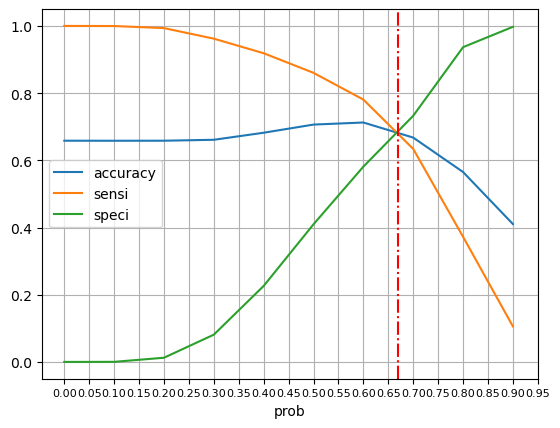

In [90]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
ax = plt.gca()
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.67, color='r', linestyle='-.') # additing axline
ax.grid(True)
plt.show()

In [91]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Delay_Prob.map(lambda x: 1 if x > 0.67 else 0)

y_train_pred_final.head()

,Target,Delay_Prob,Pred_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.840924,214,1,1,1,1,1,1,1,1,1,1,0
1,1,0.726401,28353,1,1,1,1,1,1,1,1,1,0,0
2,0,0.537998,70381,0,1,1,1,1,1,1,0,0,0,0
3,1,0.523799,93001,0,1,1,1,1,1,1,0,0,0,0
4,1,0.734966,91650,1,1,1,1,1,1,1,1,1,0,0


In [92]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.predicted))

0.6908219907231389


In [93]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.predicted )
confusion

array([[15382,  7082],
       [13248, 30043]], dtype=int64)

In [94]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [95]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6939779630870158

In [96]:
# Let us calculate specificity
TN / float(TN+FP)

0.6847400284900285

In [97]:
# Calculate false postive rate - predicting Conversion when customer does not have converted
print(FP/ float(TN+FP))

0.31525997150997154


In [98]:
# positive predictive value 
print (TP / float(TP+FP))

0.8092390572390572


In [99]:
# Negative predictive value
print (TN / float(TN+ FN))

0.5372685993712889


# Making predictions on the test set

In [100]:
X_test[['USD Amount','PAYMENT_TERM']] = scaler.fit_transform(X_test[['USD Amount','PAYMENT_TERM']])

X_test.head()

,USD Amount,PAYMENT_TERM,Cust_Segment,Day_of_Month,Day_of_Week,Monthof_Year,INVOICE_CURRENCY_CODE_Others,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD
84001,-0.546892,-0.053892,0.0,30,6,5,0,0,0
24346,4.946288,0.316902,2.0,30,6,5,0,0,0
53029,-0.540478,-0.134499,0.0,30,6,5,0,0,0
73501,-0.335537,-0.053892,2.0,30,6,5,0,0,1
46575,0.277263,0.236295,2.0,30,1,3,0,1,0


In [101]:
X_test = X_test[col]
X_test.head()

,USD Amount,PAYMENT_TERM,Cust_Segment,Day_of_Week,Monthof_Year,INVOICE_CURRENCY_CODE_Others,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD
84001,-0.546892,-0.053892,0.0,6,5,0,0,0
24346,4.946288,0.316902,2.0,6,5,0,0,0
53029,-0.540478,-0.134499,0.0,6,5,0,0,0
73501,-0.335537,-0.053892,2.0,6,5,0,0,1
46575,0.277263,0.236295,2.0,1,3,0,1,0


In [102]:
X_test_sm = sm.add_constant(X_test)

In [103]:
y_test_pred = res.predict(X_test_sm)

In [104]:
y_test_pred[:10]

84001    0.517140
24346    0.329009
53029    0.545523
73501    0.789145
46575    0.738108
41952    0.651119
2843     0.669776
71566    0.584359
56661    0.254415
47901    0.780357
dtype: float64

In [105]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [106]:
# Let's see the head
y_pred_1.head()

,0
84001,0.517140
24346,0.329009
53029,0.545523
73501,0.789145
46575,0.738108


In [107]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [108]:
# Putting CustID to index
y_test_df['Pred_ID'] = y_test_df.index

In [109]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [110]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [111]:
y_pred_final.head()

,Target,Pred_ID,0
0,0,84001,0.517140
1,0,24346,0.329009
2,0,53029,0.545523
3,0,73501,0.789145
4,0,46575,0.738108


In [112]:
# Renaming the column 

y_pred_final = y_pred_final.rename(columns={ 0 : 'Delay_Prob'})

In [113]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Pred_ID','Target','Delay_Prob'], axis=1)

In [114]:
y_pred_final.head()

,Pred_ID,Target,Delay_Prob
0,84001,0,0.517140
1,24346,0,0.329009
2,53029,0,0.545523
3,73501,0,0.789145
4,46575,0,0.738108


In [115]:
y_pred_final['final_predicted'] = y_pred_final.Delay_Prob.map(lambda x: 1 if x > 0.67 else 0)

In [116]:
y_pred_final.head()

,Pred_ID,Target,Delay_Prob,final_predicted
0,84001,0,0.517140,0
1,24346,0,0.329009,0
2,53029,0,0.545523,0
3,73501,0,0.789145,1
4,46575,0,0.738108,1


In [117]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Target, y_pred_final.final_predicted)

0.6902987722659853

In [118]:
confusion2 = metrics.confusion_matrix(y_pred_final.Target, y_pred_final.final_predicted )
confusion2

array([[ 6536,  2959],
       [ 5769, 12918]], dtype=int64)

In [119]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6912827099052817

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.6883622959452343

In [122]:
# Precision: TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8092390572390572

In [123]:
# Recall: TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6939779630870158

## The above model is giving 67% accuracy and 86% Recall on test set. Considering it acceptable, now we will deploy this model on the actual test dataset.

In [124]:
# Loading data

open_invoice = pd.read_csv('Open_Invoice_data.csv', encoding='latin1')
open_invoice.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [125]:
open_invoice.shape

(88204, 14)

In [126]:
# Converting date columns to date format

open_invoice['AS_OF_DATE'] = pd.to_datetime(open_invoice['AS_OF_DATE'])
open_invoice['Due Date']  = pd.to_datetime(open_invoice['Due Date']) 
open_invoice['Transaction Date'] = pd.to_datetime(open_invoice['Transaction Date']) 
open_invoice['INV_CREATION_DATE'] = pd.to_datetime(open_invoice['INV_CREATION_DATE']) 

open_invoice.head(10)

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,2022-04-04 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,2021-12-21,Immediate,2021-12-21,AED,"-3,088",CREDIT NOTE,105,"-3,088",2021-12-21 12:53:00
1,2022-04-04 01:07:01,Related Party,AL J Corp,23152.0,100220000052,2022-01-02,30 Days from Inv Date,2022-03-03,USD,"2,000",INVOICE,33,"2,000",2022-02-01 14:09:00
2,2022-04-04 01:07:01,Related Party,AL J Corp,23152.0,100220000143,2022-03-24,30 Days from Inv Date,2022-04-23,USD,"2,000",INVOICE,-18,"2,000",2022-03-24 17:46:00
3,2022-04-04 01:07:01,Related Party,AL R Corp,23312.0,100220000001,2022-04-01,15 Days from Inv Date,2022-01-19,AED,"2,415",INVOICE,76,"2,415",2022-01-05 11:49:00
4,2022-04-04 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,2022-03-03,30 Days from EOM,2022-04-30,AED,"3,800",INVOICE,-25,"3,800",2022-03-03 22:30:00
5,2022-04-04 01:07:01,Related Party,ALLI Corp,7530.0,100220000106,2022-03-03,30 Days from EOM,2022-04-30,AED,"1,264",INVOICE,-25,"1,264",2022-03-03 22:30:00
6,2022-04-04 01:07:01,Related Party,ALLI Corp,7530.0,100220000124,2022-03-15,30 Days from EOM,2022-04-30,AED,"25,858",INVOICE,-25,"25,858",2022-03-15 19:06:00
7,2022-04-04 01:07:01,Related Party,ALLI Corp,7530.0,100220000125,2022-03-15,30 Days from EOM,2022-04-30,AED,"39,873",INVOICE,-25,"39,873",2022-03-15 19:06:00
8,2022-04-04 01:07:01,Related Party,ALLI Corp,7530.0,100220000128,2022-03-15,30 Days from EOM,2022-04-30,AED,"75,074",INVOICE,-25,"75,074",2022-03-15 19:06:00
9,2022-04-04 01:07:01,Related Party,ALLI Corp,7530.0,100220000129,2022-03-15,30 Days from EOM,2022-04-30,AED,"21,946",INVOICE,-25,"21,946",2022-03-15 19:06:00


In [127]:
# looking at the history data
history.head()

,USD Amount,PAYMENT_TERM,INVOICE_CURRENCY_CODE,Cust_Segment,Day_of_Month,Day_of_Week,Monthof_Year,Target
0,101018.63040,58,AED,0.0,30,2,12,1
1,48990.21133,30,SAR,0.0,28,3,1,1
2,41991.60971,30,SAR,0.0,1,0,3,0
3,41991.60971,30,SAR,2.0,14,3,1,1
4,41991.60971,30,SAR,0.0,14,3,1,1


In [128]:
col

Index(['USD Amount', 'PAYMENT_TERM', 'Cust_Segment', 'Day_of_Week',
       'Monthof_Year', 'INVOICE_CURRENCY_CODE_Others',
       'INVOICE_CURRENCY_CODE_SAR', 'INVOICE_CURRENCY_CODE_USD'],
      dtype='object')

## Dataframe for prediction:

In [129]:
open_invoice["PAYMENT_TERM"] = (open_invoice["Due Date"] - open_invoice.INV_CREATION_DATE).dt.days
open_invoice.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,PAYMENT_TERM
0,2022-04-04 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,2021-12-21,Immediate,2021-12-21,AED,"-3,088",CREDIT NOTE,105,"-3,088",2021-12-21 12:53:00,-1
1,2022-04-04 01:07:01,Related Party,AL J Corp,23152.0,100220000052,2022-01-02,30 Days from Inv Date,2022-03-03,USD,"2,000",INVOICE,33,"2,000",2022-02-01 14:09:00,29
2,2022-04-04 01:07:01,Related Party,AL J Corp,23152.0,100220000143,2022-03-24,30 Days from Inv Date,2022-04-23,USD,"2,000",INVOICE,-18,"2,000",2022-03-24 17:46:00,29
3,2022-04-04 01:07:01,Related Party,AL R Corp,23312.0,100220000001,2022-04-01,15 Days from Inv Date,2022-01-19,AED,"2,415",INVOICE,76,"2,415",2022-01-05 11:49:00,13
4,2022-04-04 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,2022-03-03,30 Days from EOM,2022-04-30,AED,"3,800",INVOICE,-25,"3,800",2022-03-03 22:30:00,57


In [130]:
# combining INVOICE_CURRENCY_CODE into others which has less than 2% values

open_invoice["INVOICE_CURRENCY_CODE"] = np.where(open_invoice["Transaction Currency"].isin(["SAR","AED", "USD"]), open_invoice["Transaction Currency"], "Others")
open_invoice.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,PAYMENT_TERM,INVOICE_CURRENCY_CODE
0,2022-04-04 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,2021-12-21,Immediate,2021-12-21,AED,"-3,088",CREDIT NOTE,105,"-3,088",2021-12-21 12:53:00,-1,AED
1,2022-04-04 01:07:01,Related Party,AL J Corp,23152.0,100220000052,2022-01-02,30 Days from Inv Date,2022-03-03,USD,"2,000",INVOICE,33,"2,000",2022-02-01 14:09:00,29,USD
2,2022-04-04 01:07:01,Related Party,AL J Corp,23152.0,100220000143,2022-03-24,30 Days from Inv Date,2022-04-23,USD,"2,000",INVOICE,-18,"2,000",2022-03-24 17:46:00,29,USD
3,2022-04-04 01:07:01,Related Party,AL R Corp,23312.0,100220000001,2022-04-01,15 Days from Inv Date,2022-01-19,AED,"2,415",INVOICE,76,"2,415",2022-01-05 11:49:00,13,AED
4,2022-04-04 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,2022-03-03,30 Days from EOM,2022-04-30,AED,"3,800",INVOICE,-25,"3,800",2022-03-03 22:30:00,57,AED


In [131]:
# Joining customer segment data with original dataframe:

open_invoice = pd.merge(open_invoice, cust_seg, left_on='Customer_Name', right_on = 'CUSTOMER_NAME', how='left')
open_invoice.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,PAYMENT_TERM,INVOICE_CURRENCY_CODE,CUSTOMER_NAME,PAYMENT_TIME_MEAN,PAYMENT_TIME_STDEV,Cust_Segment
0,2022-04-04 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,2021-12-21,Immediate,2021-12-21,AED,"-3,088",CREDIT NOTE,105,"-3,088",2021-12-21 12:53:00,-1,AED,GIVE Corp,171.660886,96.295939,2.0
1,2022-04-04 01:07:01,Related Party,AL J Corp,23152.0,100220000052,2022-01-02,30 Days from Inv Date,2022-03-03,USD,"2,000",INVOICE,33,"2,000",2022-02-01 14:09:00,29,USD,AL J Corp,62.059574,64.729059,0.0
2,2022-04-04 01:07:01,Related Party,AL J Corp,23152.0,100220000143,2022-03-24,30 Days from Inv Date,2022-04-23,USD,"2,000",INVOICE,-18,"2,000",2022-03-24 17:46:00,29,USD,AL J Corp,62.059574,64.729059,0.0
3,2022-04-04 01:07:01,Related Party,AL R Corp,23312.0,100220000001,2022-04-01,15 Days from Inv Date,2022-01-19,AED,"2,415",INVOICE,76,"2,415",2022-01-05 11:49:00,13,AED,AL R Corp,139.590674,52.746917,0.0
4,2022-04-04 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,2022-03-03,30 Days from EOM,2022-04-30,AED,"3,800",INVOICE,-25,"3,800",2022-03-03 22:30:00,57,AED,ALLI Corp,46.141364,40.339591,0.0


In [132]:
open_invoice["Day_of_Month"] = open_invoice["Due Date"].dt.day
open_invoice["Day_of_Week"] = open_invoice["Due Date"].dt.weekday
open_invoice["Monthof_Year"] = open_invoice["Due Date"].dt.month
open_invoice.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,...,INV_CREATION_DATE,PAYMENT_TERM,INVOICE_CURRENCY_CODE,CUSTOMER_NAME,PAYMENT_TIME_MEAN,PAYMENT_TIME_STDEV,Cust_Segment,Day_of_Month,Day_of_Week,Monthof_Year
0,2022-04-04 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,2021-12-21,Immediate,2021-12-21,AED,"-3,088",...,2021-12-21 12:53:00,-1,AED,GIVE Corp,171.660886,96.295939,2.0,21,1,12
1,2022-04-04 01:07:01,Related Party,AL J Corp,23152.0,100220000052,2022-01-02,30 Days from Inv Date,2022-03-03,USD,"2,000",...,2022-02-01 14:09:00,29,USD,AL J Corp,62.059574,64.729059,0.0,3,3,3
2,2022-04-04 01:07:01,Related Party,AL J Corp,23152.0,100220000143,2022-03-24,30 Days from Inv Date,2022-04-23,USD,"2,000",...,2022-03-24 17:46:00,29,USD,AL J Corp,62.059574,64.729059,0.0,23,5,4
3,2022-04-04 01:07:01,Related Party,AL R Corp,23312.0,100220000001,2022-04-01,15 Days from Inv Date,2022-01-19,AED,"2,415",...,2022-01-05 11:49:00,13,AED,AL R Corp,139.590674,52.746917,0.0,19,2,1
4,2022-04-04 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,2022-03-03,30 Days from EOM,2022-04-30,AED,"3,800",...,2022-03-03 22:30:00,57,AED,ALLI Corp,46.141364,40.339591,0.0,30,5,4


In [133]:
test_data_0 = open_invoice[['USD Amount', 'PAYMENT_TERM', 'INVOICE_CURRENCY_CODE', 'Cust_Segment', 'Day_of_Month',
                        'Day_of_Week', 'Monthof_Year', 'AGE']]
test_data_0.head()

,USD Amount,PAYMENT_TERM,INVOICE_CURRENCY_CODE,Cust_Segment,Day_of_Month,Day_of_Week,Monthof_Year,AGE
0,"-3,088",-1,AED,2.0,21,1,12,105
1,"2,000",29,USD,0.0,3,3,3,33
2,"2,000",29,USD,0.0,23,5,4,-18
3,"2,415",13,AED,0.0,19,2,1,76
4,"3,800",57,AED,0.0,30,5,4,-25


In [134]:
test_data = test_data_0[test_data_0['AGE']<0]

In [135]:
test_data.shape

(28080, 8)

In [136]:
test_data = test_data[['USD Amount', 'PAYMENT_TERM', 'INVOICE_CURRENCY_CODE', 'Cust_Segment', 'Day_of_Month',
                        'Day_of_Week', 'Monthof_Year']]

In [137]:
test_data

,USD Amount,PAYMENT_TERM,INVOICE_CURRENCY_CODE,Cust_Segment,Day_of_Month,Day_of_Week,Monthof_Year
2,"2,000",29,USD,0.0,23,5,4
4,"3,800",57,AED,0.0,30,5,4
5,"1,264",57,AED,0.0,30,5,4
6,"25,858",45,AED,0.0,30,5,4
7,"39,873",45,AED,0.0,30,5,4
...,...,...,...,...,...,...,...
88172,"3,435",59,USD,0.0,29,6,5
88186,"114,039",89,USD,2.0,5,6,6
88187,"32,138",59,USD,2.0,16,0,5
88188,"26,764",59,USD,2.0,17,1,5


In [138]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy2 = pd.get_dummies(test_data[["INVOICE_CURRENCY_CODE"]], drop_first=True)

# Adding the results to the master dataframe
test_data = pd.concat([test_data, dummy2], axis=1)

test_data.head()

,USD Amount,PAYMENT_TERM,INVOICE_CURRENCY_CODE,Cust_Segment,Day_of_Month,Day_of_Week,Monthof_Year,INVOICE_CURRENCY_CODE_Others,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD
2,"2,000",29,USD,0.0,23,5,4,0,0,1
4,"3,800",57,AED,0.0,30,5,4,0,0,0
5,"1,264",57,AED,0.0,30,5,4,0,0,0
6,"25,858",45,AED,0.0,30,5,4,0,0,0
7,"39,873",45,AED,0.0,30,5,4,0,0,0


In [139]:
test_data.dtypes

USD Amount                       object
PAYMENT_TERM                      int64
INVOICE_CURRENCY_CODE            object
Cust_Segment                    float64
Day_of_Month                      int64
Day_of_Week                       int64
Monthof_Year                      int64
INVOICE_CURRENCY_CODE_Others      uint8
INVOICE_CURRENCY_CODE_SAR         uint8
INVOICE_CURRENCY_CODE_USD         uint8
dtype: object

In [140]:
test_data['USD Amount'] = test_data['USD Amount'].str.replace(',', '').astype(float)
test_data.dtypes

USD Amount                      float64
PAYMENT_TERM                      int64
INVOICE_CURRENCY_CODE            object
Cust_Segment                    float64
Day_of_Month                      int64
Day_of_Week                       int64
Monthof_Year                      int64
INVOICE_CURRENCY_CODE_Others      uint8
INVOICE_CURRENCY_CODE_SAR         uint8
INVOICE_CURRENCY_CODE_USD         uint8
dtype: object

In [141]:
test_data.drop(columns=["INVOICE_CURRENCY_CODE"],inplace=True)
test_data.head()

,USD Amount,PAYMENT_TERM,Cust_Segment,Day_of_Month,Day_of_Week,Monthof_Year,INVOICE_CURRENCY_CODE_Others,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD
2,2000.0,29,0.0,23,5,4,0,0,1
4,3800.0,57,0.0,30,5,4,0,0,0
5,1264.0,57,0.0,30,5,4,0,0,0
6,25858.0,45,0.0,30,5,4,0,0,0
7,39873.0,45,0.0,30,5,4,0,0,0


## Making predictions on the Open Invoices

In [142]:
test_data[['USD Amount','PAYMENT_TERM']] = scaler.fit_transform(test_data[['USD Amount','PAYMENT_TERM']])

test_data.head()

,USD Amount,PAYMENT_TERM,Cust_Segment,Day_of_Month,Day_of_Week,Monthof_Year,INVOICE_CURRENCY_CODE_Others,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD
2,-0.129391,-0.759571,0.0,23,5,4,0,0,1
4,-0.097561,-0.282073,0.0,30,5,4,0,0,0
5,-0.142406,-0.282073,0.0,30,5,4,0,0,0
6,0.292503,-0.486715,0.0,30,5,4,0,0,0
7,0.540339,-0.486715,0.0,30,5,4,0,0,0


In [143]:
test_data = test_data[col]
test_data.head()

,USD Amount,PAYMENT_TERM,Cust_Segment,Day_of_Week,Monthof_Year,INVOICE_CURRENCY_CODE_Others,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD
2,-0.129391,-0.759571,0.0,5,4,0,0,1
4,-0.097561,-0.282073,0.0,5,4,0,0,0
5,-0.142406,-0.282073,0.0,5,4,0,0,0
6,0.292503,-0.486715,0.0,5,4,0,0,0
7,0.540339,-0.486715,0.0,5,4,0,0,0


In [144]:
test_data_sm = sm.add_constant(test_data)

In [145]:
test_data_pred = res.predict(test_data_sm)

In [146]:
test_data_pred.head(10)

2     0.870768
4     0.575724
5     0.576938
6     0.634895
7     0.628505
8     0.612261
9     0.636670
10    0.652810
11    0.693911
12    0.693786
dtype: float64

In [147]:
test_data_pred_final = pd.DataFrame({'Delay_Prob':test_data_pred})

test_data_pred_final['Pred_ID'] = test_data.index

test_data_pred_final.head()

,Delay_Prob,Pred_ID
2,0.870768,2
4,0.575724,4
5,0.576938,5
6,0.634895,6
7,0.628505,7


In [148]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.64 else 0

test_data_pred_final['predicted'] = test_data_pred_final.Delay_Prob.map(lambda x: 1 if x > 0.67 else 0)

test_data_pred_final.head()

,Delay_Prob,Pred_ID,predicted
2,0.870768,2,1
4,0.575724,4,0
5,0.576938,5,0
6,0.634895,6,0
7,0.628505,7,0


In [149]:
recommendation = pd.concat([test_data, test_data_pred_final], axis = 1)
recommendation.drop(columns=['Delay_Prob', 'Pred_ID'])

,USD Amount,PAYMENT_TERM,Cust_Segment,Day_of_Week,Monthof_Year,INVOICE_CURRENCY_CODE_Others,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,predicted
2,-0.129391,-0.759571,0.0,5,4,0,0,1,1
4,-0.097561,-0.282073,0.0,5,4,0,0,0,0
5,-0.142406,-0.282073,0.0,5,4,0,0,0,0
6,0.292503,-0.486715,0.0,5,4,0,0,0,0
7,0.540339,-0.486715,0.0,5,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...
88172,-0.104015,-0.247966,0.0,6,5,0,0,1,1
88186,1.851858,0.263639,2.0,6,6,0,0,1,1
88187,0.403556,-0.247966,2.0,0,5,0,0,1,1
88188,0.308525,-0.247966,2.0,1,5,0,0,1,1


In [150]:
recommendation2 = pd.concat([open_invoice[['Customer_Name', 'Transaction Number', 'Due Date', 'USD Amount']], test_data_pred_final['predicted']], axis = 1)
final_recommendation = recommendation2[recommendation2.predicted == 1]
final_recommendation.head()

,Customer_Name,Transaction Number,Due Date,USD Amount,predicted
2,AL J Corp,100220000143,2022-04-23,"2,000",1.0
11,ALLI Corp,100220000135,2022-04-30,"2,001",1.0
12,ALLI Corp,100220000136,2022-04-30,"2,301",1.0
13,ALLI Corp,100220000137,2022-04-30,"2,001",1.0
14,ALLI Corp,100220000138,2022-04-30,"2,001",1.0


In [151]:
# These customers should be contacted before the due date as they are likely to be delying the payment.
final_recommendation

,Customer_Name,Transaction Number,Due Date,USD Amount,predicted
2,AL J Corp,100220000143,2022-04-23,"2,000",1.0
11,ALLI Corp,100220000135,2022-04-30,"2,001",1.0
12,ALLI Corp,100220000136,2022-04-30,"2,301",1.0
13,ALLI Corp,100220000137,2022-04-30,"2,001",1.0
14,ALLI Corp,100220000138,2022-04-30,"2,001",1.0
...,...,...,...,...,...
88172,MIDD Corp,165220000039,2022-05-29,"3,435",1.0
88186,SAUD Corp,165220000032,2022-06-05,"114,039",1.0
88187,SAUD Corp,165220000034,2022-05-16,"32,138",1.0
88188,SAUD Corp,165220000035,2022-05-17,"26,764",1.0


# <font color = maroon> <p style='text-align: left;'> Recommendation: </p>

## Out of 28080 open invoices for which the payment is due in future, 15440 are likely to delay their payment. The Schuster should chase these invoice's customers before the due dates.